In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

/home/jaidevd/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jaidevd/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
model = load_model('checkpoints/resnet50-best.h5')
df = pd.read_csv('data/train.csv')

In [8]:
df['class'].value_counts(normalize=True)

bar           0.220513
scatter       0.215385
line          0.205128
donut         0.192308
choropleth    0.166667
Name: class, dtype: float64

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [19]:
import numpy as np

# Bar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

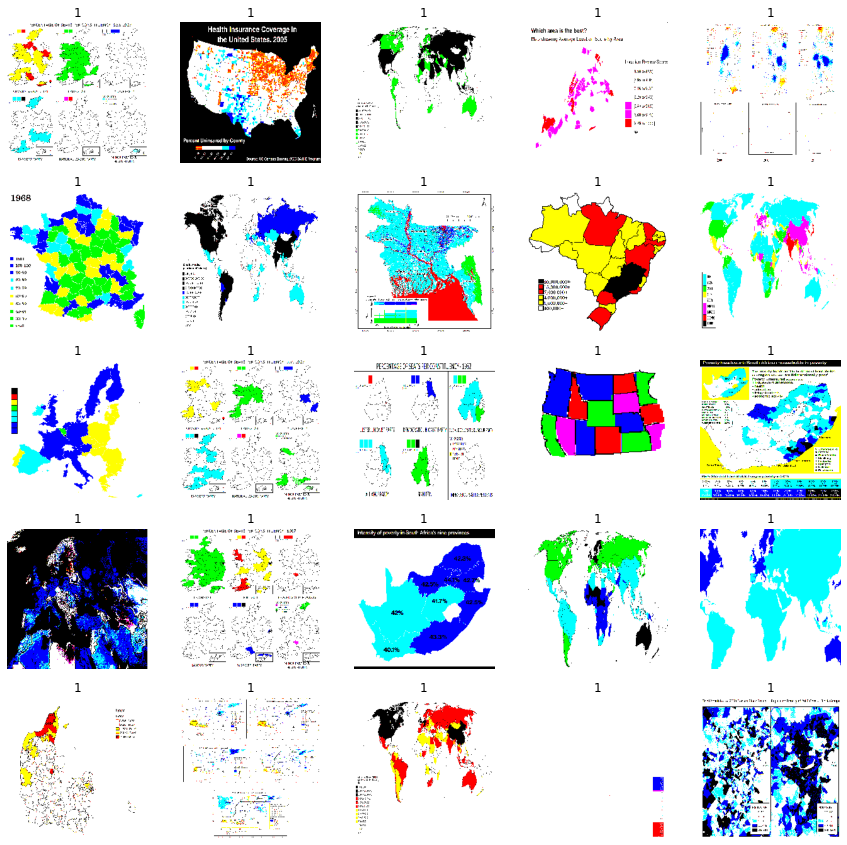

In [35]:
xdf = df[df['class'] == 'choropleth'].sample(25)
images = [preprocess_input(img_to_array(load_img(x.path, target_size=(224, 224)))) for _, x in xdf.iterrows()]
X = np.r_[images]
p = tf.argmax(tf.nn.softmax(model.predict(X), axis=1), axis=1).numpy()

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(X[i * 5 + j])
        ax[i, j].set_axis_off()
        ax[i, j].set_title(str(p[i * 5 + j]))

In [29]:
for i in range(5):
    for j in range(5):
        print(i * 5 + j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [16]:
preprocess_input?

Signature: preprocess_input(x, data_format=None)
Docstring:
Preprocesses a tensor or Numpy array encoding a batch of images.

Usage example with `applications.MobileNet`:

```python
i = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
x = tf.cast(i, tf.float32)
x = tf.keras.applications.mobilenet.preprocess_input(x)
core = tf.keras.applications.MobileNet()
x = core(x)
model = tf.keras.Model(inputs=[i], outputs=[x])

image = tf.image.decode_png(tf.io.read_file('file.png'))
result = model(image)
```

Args:
  x: A floating point `numpy.array` or a `tf.Tensor`, 3D or 4D with 3 color
    channels, with values in the range [0, 255].
    The preprocessed data are written over the input data
    if the data types are compatible. To avoid this
    behaviour, `numpy.copy(x)` can be used.
  data_format: Optional data format of the image tensor/array. Defaults to
    None, in which case the global setting
    `tf.keras.backend.image_data_format()` is used (unless you changed it,
    it def